<a href="https://colab.research.google.com/github/alyssanbnco/baruch/blob/master/CIS9655_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NYC Bicycle Network data set

In [ ]:
routes_df = pd.read_csv('/content/NYC_BICYCLE_NETWORK_20D_20220413.csv')

In [ ]:
routes_df.columns

Index(['the_geom', 'segmentid', 'Shape_Le_1', 'boro', 'street', 'fromstreet',
       'tostreet', 'onoffst', 'facilitycl', 'allclasses', 'bikedir',
       'lanecount', 'ft_facilit', 'tf_facilit', 'ft2facilit', 'tf2facilit',
       'comments'],
      dtype='object')

## Cleaning bike routes dataset
2:1 Number of bike lanes, NYC boroughs and on street status 

In [ ]:
routes_df.head()

,the_geom,segmentid,Shape_Le_1,boro,street,fromstreet,tostreet,onoffst,facilitycl,allclasses,bikedir,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments
0,MULTILINESTRING ((-74.24992754986717 40.500876...,53,131.771990,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
1,MULTILINESTRING ((-74.24915648792326 40.498717...,57,268.689582,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
2,MULTILINESTRING ((-74.24934702119957 40.499440...,59,420.193253,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
3,MULTILINESTRING ((-74.25185153133741 40.502805...,61,238.242198,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
4,MULTILINESTRING ((-74.2513327304861 40.5022891...,64,646.293832,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN


1 = Manhattan
2 = Bronx
3 = Brooklyn
4 = Queens
5 = Staten Island

In [ ]:
routes_df['onoffst'].value_counts(normalize=True)

ON     0.826786
OFF    0.173214
Name: onoffst, dtype: float64

In [ ]:
pd.crosstab(routes_df['boro'],routes_df['onoffst'], normalize=True)

onoffst,OFF,ON
boro,,
1,0.055801,0.211775
2,0.033279,0.118325
3,0.028621,0.251537
4,0.036256,0.210142
5,0.019257,0.035008


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


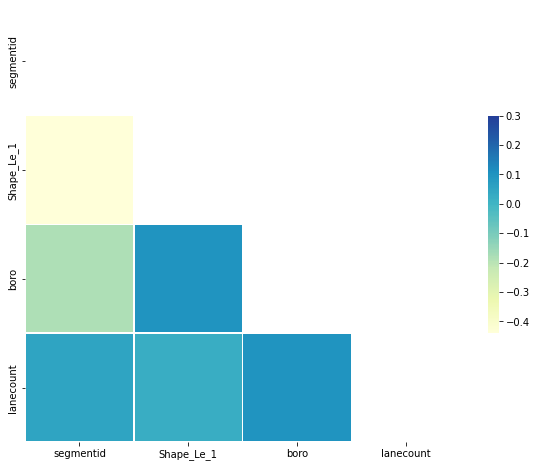

In [ ]:
corr = routes_df.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.30, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from sklearn import preprocessing
nom_features= ['facilitycl','onoffst','allclasses']
train_nom = routes_df[nom_features]
for col in nom_features:
    le = preprocessing.LabelEncoder()
    train_nom[col] = le.fit_transform(train_nom[col])
    
train_nom.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,facilitycl,onoffst,allclasses
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
routes_df[['MULTISTRING', 'LAT', 'LONG','Filler']] = routes_df['the_geom'].str.split('(', expand=True)
routes_df

,the_geom,segmentid,Shape_Le_1,boro,street,fromstreet,tostreet,onoffst,facilitycl,allclasses,...,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments,MULTISTRING,LAT,LONG,Filler
0,MULTILINESTRING ((-74.24992754986717 40.500876...,53,131.771990,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-74.24992754986717 40.50087622728695, -74.2496...",None
1,MULTILINESTRING ((-74.24915648792326 40.498717...,57,268.689582,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-74.24915648792326 40.49871712913556, -74.2493...",None
2,MULTILINESTRING ((-74.24934702119957 40.499440...,59,420.193253,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-74.24934702119957 40.49944014889296, -74.2496...",None
3,MULTILINESTRING ((-74.25185153133741 40.502805...,61,238.242198,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-74.25185153133741 40.50280531364854, -74.2517...",None
4,MULTILINESTRING ((-74.2513327304861 40.5022891...,64,646.293832,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-74.2513327304861 40.50228915504668, -74.24992...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,MULTILINESTRING ((-73.75709293410263 40.762361...,233514,20.079888,4,NORTHERN BLVD,DOUGLASTON PKWY,223 ST,ON,I,I,...,2,Protected Path,Protected Path,NaN,NaN,NaN,MULTILINESTRING,,"-73.75709293410263 40.76236124409506, -73.7571...",None
20820,MULTILINESTRING ((-73.75580451545652 40.762658...,233466,41.474371,4,CROSS IS PKWY,NORTHERN BLVD,TOTTEN AV,OFF,I,I,...,2,Greenway,Greenway,NaN,NaN,NaN,MULTILINESTRING,,"-73.75580451545652 40.762658734309106, -73.755...",None
20821,MULTILINESTRING ((-73.96753196711434 40.681768...,163713,30.584273,3,VANDERBILT AV,PACIFIC ST,ATLANTIC AV,ON,II,II,...,2,Curbside,Standard,NaN,NaN,NaN,MULTILINESTRING,,"-73.96753196711434 40.68176878380704, -73.9675...",None
20822,MULTILINESTRING ((-73.96747796358206 40.681586...,163714,236.451695,3,VANDERBILT AV,PACIFIC ST,ATLANTIC AV,ON,II,II,...,2,Curbside,Standard,NaN,NaN,NaN,MULTILINESTRING,,"-73.96747796358206 40.68158629015597, -73.9676...",None


In [ ]:
routes_df.drop(['facilitycl','onoffst','fromstreet', 'tostreet','street','ft_facilit','tf_facilit','allclasses','MULTISTRING','comments','LAT','Filler'], axis='columns', inplace=True)
routes_df.head()

,the_geom,segmentid,Shape_Le_1,boro,bikedir,lanecount,ft2facilit,tf2facilit,LONG
0,MULTILINESTRING ((-74.24992754986717 40.500876...,53,131.771990,5,2,2,NaN,NaN,"-74.24992754986717 40.50087622728695, -74.2496..."
1,MULTILINESTRING ((-74.24915648792326 40.498717...,57,268.689582,5,2,2,NaN,NaN,"-74.24915648792326 40.49871712913556, -74.2493..."
2,MULTILINESTRING ((-74.24934702119957 40.499440...,59,420.193253,5,2,2,NaN,NaN,"-74.24934702119957 40.49944014889296, -74.2496..."
3,MULTILINESTRING ((-74.25185153133741 40.502805...,61,238.242198,5,2,2,NaN,NaN,"-74.25185153133741 40.50280531364854, -74.2517..."
4,MULTILINESTRING ((-74.2513327304861 40.5022891...,64,646.293832,5,2,2,NaN,NaN,"-74.2513327304861 40.50228915504668, -74.24992..."


In [ ]:
train_final2 = pd.concat([routes_df, train_nom], axis = 1)
train_final2.head()

,the_geom,segmentid,Shape_Le_1,boro,bikedir,lanecount,ft2facilit,tf2facilit,LONG,facilitycl,onoffst,allclasses
0,MULTILINESTRING ((-74.24992754986717 40.500876...,53,131.771990,5,2,2,NaN,NaN,"-74.24992754986717 40.50087622728695, -74.2496...",0,0,0
1,MULTILINESTRING ((-74.24915648792326 40.498717...,57,268.689582,5,2,2,NaN,NaN,"-74.24915648792326 40.49871712913556, -74.2493...",0,0,0
2,MULTILINESTRING ((-74.24934702119957 40.499440...,59,420.193253,5,2,2,NaN,NaN,"-74.24934702119957 40.49944014889296, -74.2496...",0,0,0
3,MULTILINESTRING ((-74.25185153133741 40.502805...,61,238.242198,5,2,2,NaN,NaN,"-74.25185153133741 40.50280531364854, -74.2517...",0,0,0
4,MULTILINESTRING ((-74.2513327304861 40.5022891...,64,646.293832,5,2,2,NaN,NaN,"-74.2513327304861 40.50228915504668, -74.24992...",0,0,0


## What is the correlation between the highest facility class found along a segment with the number of bike lanes on a segment in any direction?

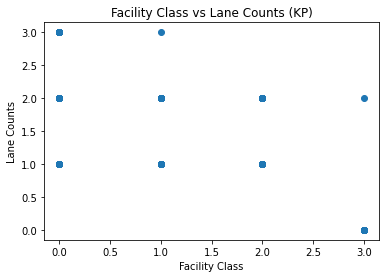

In [ ]:
x = train_final2['facilitycl']
y = train_final2['lanecount']
plt.scatter(x,y)
plt.xlabel('Facility Class')
plt.ylabel('Lane Counts')
plt.title('Facility Class vs Lane Counts (KP)')
plt.show()

Highest number of lane counts within a segment that has a protected bike lane on one side of the street (class I) and a shared lane (class III) on the opposite, rather than other facility classes. 


## Which borough was the most repeated in the dataset?

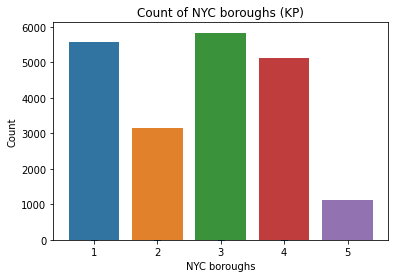

In [ ]:
sns.countplot(x="boro",data=train_final2)
plt.scatter(x,y)
plt.xlabel('NYC boroughs')
plt.ylabel('Count')
plt.title('Count of NYC boroughs (KP)')
plt.show()

Brooklyn has the highest count with nearly 6000 bike lane paths, followed closely by Manhattan and then Queens.


## What is the correlation between the number of bike lanes on a segment in any direction and its NYC borough?

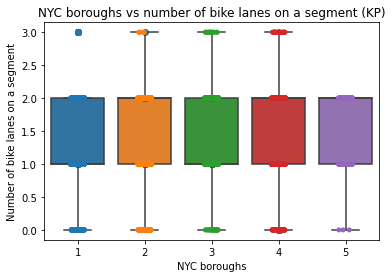

In [ ]:
import seaborn as sns
sns.boxplot(x="boro", y="lanecount", data=train_final2)
sns.stripplot(x="boro", y="lanecount", data=train_final2, jitter=True,
              edgecolor="gray")
plt.scatter(x,y)
plt.xlabel('NYC boroughs')
plt.ylabel('Number of bike lanes on a segment')
plt.title('NYC boroughs vs number of bike lanes on a segment (KP)')
plt.show()

Through the boxplot, we can also see that although Manhattan had the second highest count mentioned in the dataset, it does not have 3 bike lanes in the given segment as Bronx, Brooklyn and Queens. 

## Is there a correlation between on street status on a segment and the NYC boroughs?

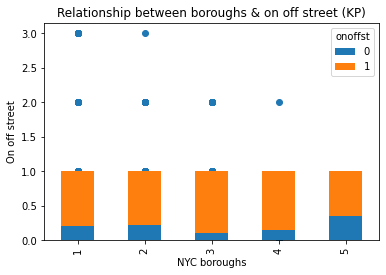

In [ ]:
pd.crosstab(train_final2.boro, train_final2.onoffst, normalize='index').plot.bar(stacked=True)
plt.scatter(x,y)
plt.xlabel('NYC boroughs')
plt.ylabel('On off street')
plt.title('Relationship between boroughs & on off street (KP)')
plt.show()

The chart shows that there are more streets present for bike lanes for all the boroughs. 

# NYC Collisions data set

## Public safety dataset

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage

In [ ]:
crash_df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916876 entries, 0 to 1916875
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  float64
 13  NUMBER OF PEDESTRIANS KILLED   float64
 14  NUMBER OF CYCLIST INJURED      float64
 15  NUMBER OF CYCLIST KILLED       float64
 16  NUMBER OF MOTORIST INJURED     float64
 17  NUMBER OF MOTORIST KILLED      float64
 18  CO

In [ ]:
# REMOVE columns we don't need
cols = [20,21,22,26,27,28]
crash_df.drop(crash_df.columns[cols],axis=1,inplace=True)

# RESET the index
crash_df.reset_index(inplace=True, drop=True)

In [ ]:
print(crash_df.shape)
crash_df.head()

(1916876, 23)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,0.0,0.0,0.0,2.0,0.0,Aggressive Driving/Road Rage,Unspecified,4455765.0,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,Pavement Slippery,NaN,4513547.0,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,Following Too Closely,Unspecified,4541903.0,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,0.0,0.0,0.0,0.0,0.0,Unspecified,NaN,4456314.0,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4486609.0,NaN,NaN


## Cleaning collisions dataset

In [ ]:
bike_crash_df = crash_df[(crash_df['NUMBER OF CYCLIST INJURED']>0) \
                         | (crash_df['NUMBER OF CYCLIST KILLED']>0)]

print(bike_crash_df.shape)

(47479, 23)


In [ ]:
# FORMAT crash DATE and TIME columns into datetime format
bike_crash_df['CRASH DATETIME'] = bike_crash_df['CRASH DATE'] + " " + bike_crash_df['CRASH TIME']
bike_crash_df['CRASH DATETIME'] = pd.to_datetime(bike_crash_df['CRASH DATETIME'])

In [ ]:
#print(bike_crash_df['CRASH DATETIME'].min())
#print(bike_crash_df['CRASH DATETIME'].max())

# FILTER date range to match Bike Volumn dataset
bike_crash_df = bike_crash_df[ (bike_crash_df['CRASH DATETIME']>='2013-01-01') 
                              & (bike_crash_df['CRASH DATETIME']<='2016-12-31') ]

print('MIN CRASH DATETIME: ', bike_crash_df['CRASH DATETIME'].min())
print('MAX CRASH DATETIME: ', bike_crash_df['CRASH DATETIME'].max())

MIN CRASH DATETIME:  2013-01-01 03:00:00
MAX CRASH DATETIME:  2016-12-30 20:55:00


In [ ]:
# REMOVE columns to simplify high-level exploratory analysis
cols = [3,4,5,6,7,8,9]
bike_crash_df.drop(crash_df.columns[cols],axis=1,inplace=True)

# RESET the index
bike_crash_df.reset_index(inplace=True, drop=True)

# format string values to be uppercase
bike_crash_df[[
            'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2'
            ,'CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2'
            ]] = bike_crash_df[[
                'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2'
                ,'CONTRIBUTING FACTOR VEHICLE 1'
                ,'CONTRIBUTING FACTOR VEHICLE 2'
                ]].astype(str).apply(lambda col: col.str.upper())


In [ ]:
#bike_crash_df['VEHICLE TYPE CODE 1'].unique()

In [ ]:
# format vehicle values
bike_crash_df.replace( {'BICYCLE': 'BIKE', 'SPORT UTILITY / STATION WAGON': 'PASSENGER'
                       , 'STATION WAGON/SPORT UTILITY VEHICLE': 'PASSENGER', 'PASSENGER VEHICLE': 'PASSENGER'
                       , 'SEDAN': 'PASSENGER', 'CONVERTIBLE': 'PASSENGER', 'CONCRETE MIXER': 'CONSTRUCTION'
                       , 'PICK-UP TRUCK': 'PK/TRUCK/VAN', 'TRUCK': 'PK/TRUCK/VAN'
                       , 'VAN': 'PK/TRUCK/VAN', 'BS': 'PASSENGER', 'PARKE': 'PARKED VEHICLE'
                       , 'PSD': 'PASSENGER', 'TRACTOR TRUCK GASOLINE': 'GAS/DIESEL TANKER'
                       , 'TRACTOR TRUCK DIESEL': 'GAS/DIESEL TANKER', 'TANKER': 'GAS/DIESEL TANKER'
                       , 'AMBU': 'EMERGENCY', 'AMBUL': 'EMERGENCY', 'AMBULANCE': 'EMERGENCY'
                       , 'FORKL': 'CONSTRUCTION', 'MARKE': 'PASSENGER', 'FDNY AMBUL': 'EMERGENCY'
                       , 'E SCO': 'SCOOTER', 'MOTORSCOOTER': 'SCOOTER', 'SEDONA': 'PASSENGER'
                       , 'MINI SCHOO': 'SCHOOL BUS', 'E-BIK': 'E-BIKE', 'E-SCO': 'SCOOTER'
                       , '4 DR SEDAN': 'PASSENGER', '2 DR SEDAN': 'PASSENGER'
                       , 'UNKNO': 'UNKNOWN', 'SANIT': 'SANITATION', 'SANITATION TRUCK': 'SANITATION'
                       , 'DUMP': 'SANITATION', 'PK': 'PK/TRUCK/VAN', 'POSTA': 'POSTAL SERVICE'
                       , 'POSTAL SERVICE TRUCK': 'POSTAL SERVICE', 'TAXI': 'TAXI/LIVERY'
                       , 'OMT': 'TAXI/LIVERY', 'LIVERY VEHICLE': 'TAXI/LIVERY'
                       , 'FIRE': 'EMERGENCY', 'FIRE TRUCK': 'EMERGENCY', 'COMME': 'COMMERCIAL'
                       , 'BOX TRUCK': 'COMMERCIAL', 'BEVERAGE TRUCK': 'COMMERCIAL'
                       , 'LARGE COM VEH(6 OR MORE TIRES)': 'COMMERCIAL'
                       , 'SMALL COM VEH(4 TIRES) ': 'COMMERCIAL', 'TRACT': 'COMMERCIAL'
                       , 'GOLF': 'OTHER', 'CARRY ALL': 'OTHER'} , inplace=True)

In [ ]:
print(bike_crash_df.shape)
#bike_crash_df.head()

(17269, 17)


## Export cleaned dataset as CSV for Tableau

In [ ]:
bike_crash_df.to_csv('bike_crash_data_cleaned_2013-2016.csv')

In [ ]:
bike_crash_df[['CRASH DATETIME', 'BOROUGH'
                , 'NUMBER OF PERSONS INJURED', 'NUMBER OF CYCLIST INJURED'
                , 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']].tail()

,CRASH DATETIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF CYCLIST INJURED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
17264,2013-01-02 15:45:00,BROOKLYN,1.0,1.0,PASSENGER,BIKE
17265,2013-01-04 13:15:00,BROOKLYN,1.0,1.0,PASSENGER,BIKE
17266,2013-01-08 15:20:00,QUEENS,1.0,1.0,PASSENGER,BIKE
17267,2013-01-09 23:00:00,QUEENS,2.0,1.0,PASSENGER,BIKE
17268,2013-01-05 21:45:00,MANHATTAN,1.0,1.0,PASSENGER,BIKE


* The data on collisions we will use in this analysis focuses on 1:1 vehicle collisions that reported a death or injury to a cyclist. 
* Each row represents an individual collision.



### How many collisions involving bikes are over time?

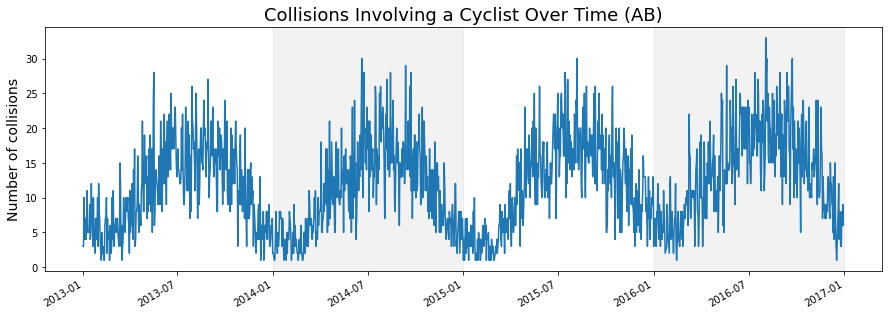

In [ ]:
# format dtypes
bike_crash_df['CRASH DATE'] = pd.to_datetime(bike_crash_df['CRASH DATE'])

# create the time series subplots

crash_yr_boro = bike_crash_df.groupby('CRASH DATE')['COLLISION_ID'].nunique()
crash_yr_boro = crash_yr_boro.reset_index()
crash_yr_boro.rename(columns={'COLLISION_ID':'COUNT'}, inplace=True)


ax = crash_yr_boro.plot( kind='line', x='CRASH DATE', y='COUNT'
                    , figsize=(15,5)
                    , legend=False )

ax.set_title("Collisions Involving a Cyclist Over Time (AB)", size=18)
ax.set_xlabel("")
ax.set_ylabel("Number of collisions", size=14)
plt.grid(False)

ax.axvspan('2014-01-01', '2014-12-31', color="grey", alpha=0.1)
ax.axvspan('2016-01-01', '2016-12-31', color="grey", alpha=0.1)

plt.show()

* There are consistently more collisions in the middle of the year.
* This seasonal trend aligns with ridership trends.


### Which boroughs have the most recorded bike collisions?

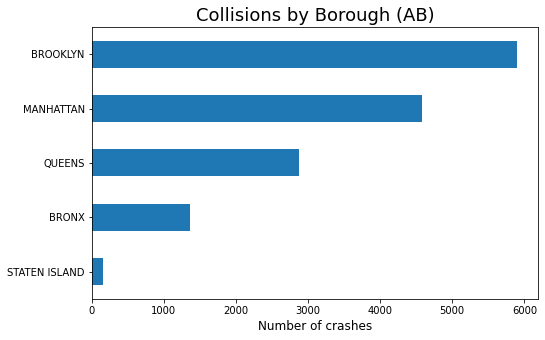

In [ ]:
ax = bike_crash_df['BOROUGH'].value_counts(
              sort=True
              , ascending=True).plot.barh(figsize=(8,5))

ax.set_title("Collisions by Borough (AB)", size=18)
ax.set_xlabel("Number of crashes", size=12)

plt.grid(False)
plt.show()

### Which vehicle types have a high collision percentage?

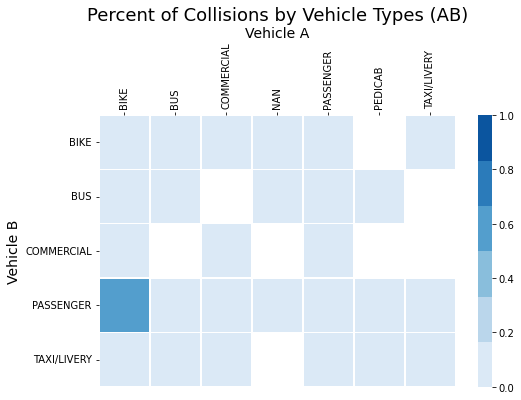

In [ ]:
#find intersection of bike_crash_df['VEHICLE TYPE CODE 1'] 
#and bike_crash_df['VEHICLE TYPE CODE 2'] values

veh_cross = pd.crosstab(bike_crash_df['VEHICLE TYPE CODE 1']
                        ,bike_crash_df['VEHICLE TYPE CODE 2']
                        ,normalize=True)

veh_cross.replace({0: np.NaN}, inplace=True)
veh_cross.dropna(thresh=4, axis=1, inplace=True)
veh_cross.dropna(thresh=3, axis=0, inplace=True)


# plot
colormap = sns.color_palette("Blues")
plt.figure(figsize=(8,5))

ax = sns.heatmap(veh_cross
                 , linewidths=0.5
                 , vmin=0, vmax=1
                 , cmap = colormap)

ax.set_title("Percent of Collisions by Vehicle Types (AB)", size=18)
ax.set_xlabel("Vehicle A", size=14)
ax.set_ylabel("Vehicle B", size=14)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

plt.show()

*   Nearly all collisions that caused death or injury to a cyclist are between a BIKE and a PASSENGER VEHICLE.

### Is there a correlation between persons injured and cyclists injured in these collisions?

In [ ]:
bike_crash_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH DATETIME
0,2016-11-03,19:00,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,UNSPECIFIED,UNSPECIFIED,3553364.0,PASSENGER,BIKE,2016-11-03 19:00:00
1,2016-12-28,17:30,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,UNSPECIFIED,UNSPECIFIED,3588477.0,PASSENGER,BIKE,2016-12-28 17:30:00
2,2016-12-29,6:55,STATEN ISLAND,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,DRIVER INATTENTION/DISTRACTION,PEDESTRIAN/BICYCLIST/OTHER PEDESTRIAN ERROR/CO...,3589028.0,PASSENGER,BIKE,2016-12-29 06:55:00
3,2016-12-28,20:25,BROOKLYN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,UNSPECIFIED,UNSPECIFIED,3588689.0,PASSENGER,BIKE,2016-12-28 20:25:00
4,2016-12-29,14:50,QUEENS,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,DRIVER INATTENTION/DISTRACTION,UNSPECIFIED,3590833.0,PASSENGER,BIKE,2016-12-29 14:50:00


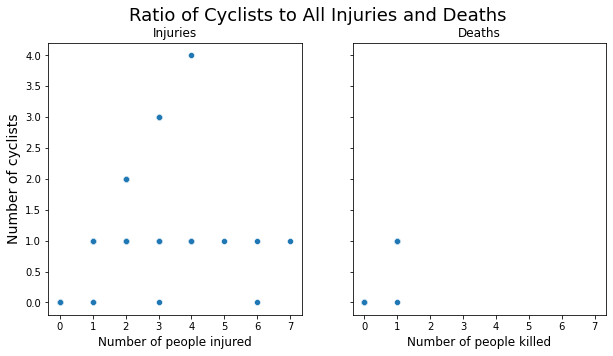

In [ ]:
# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
fig.suptitle('Ratio of Cyclists to All Injuries and Deaths', size=18)

sns.scatterplot(ax=axes[0]
                     , y='NUMBER OF CYCLIST INJURED'
                     , x='NUMBER OF PERSONS INJURED'
                     , data=bike_crash_df)
axes[0].set_title("Injuries")

sns.scatterplot(ax=axes[1]
                     , y='NUMBER OF CYCLIST KILLED'
                     , x='NUMBER OF PERSONS KILLED'
                     , data=bike_crash_df
                     , vmin=0, vmax=10)
axes[1].set_title("Deaths")

axes[0].set_ylabel("Number of cyclists", size=14)
axes[0].set_xlabel("Number of people injured", size=12)

axes[1].set_xlabel("Number of people killed", size=12)

plt.show()

* As the number of total people injured per collision increases, there is not enough evidence to suggest that the percent of cyclists per collision increases.